# Lyrics generation model finetuned from T5

In [1]:
import re
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

from finetune.t5.finetune import get_model, evaluate

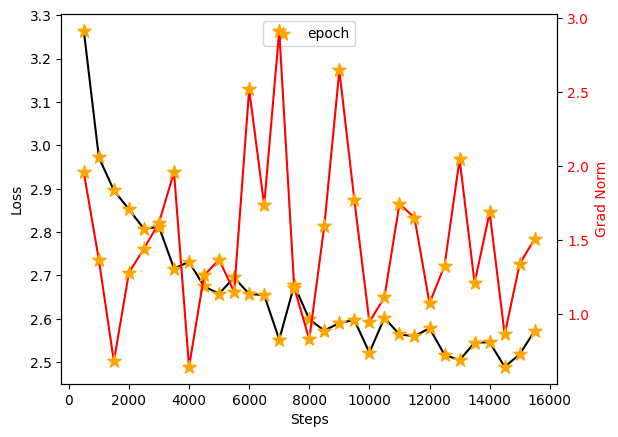

In [2]:
log = EventAccumulator('./checkpoints/runs/Apr25_14-49-47_gn-3/events.out.tfevents.1714049387.gn-3.20378.0')
log.Reload()

loss = [event.value for event in log.Scalars("train/loss")]
grad_norm = [event.value for event in log.Scalars("train/grad_norm")]
steps = [event.step for event in log.Scalars("train/loss")]

fig, ax1 = plt.subplots()

ax1.set_xlabel('Steps')
ax1.set_ylabel('Loss', color="black")
ax1.plot(steps, loss, color="black")
ax1.tick_params(axis='y', labelcolor="black")
ax1.scatter(steps, loss, color="orange", marker="*", label="epoch", zorder=10, s=100)
ax1.legend(loc="upper center")

ax2 = ax1.twinx()
ax2.set_ylabel('Grad Norm', color="red")
ax2.plot(steps, grad_norm, color="red")
ax2.tick_params(axis='y', labelcolor="red")
ax2.scatter(steps, grad_norm, color="orange", marker="*", zorder=10, s=100)

plt.show()

In [3]:
models = {
    "EPOCH 1": "./checkpoints/checkpoint-1576",
    "EPOCH 6": "./checkpoints/checkpoint-9456",
    "EPOCH 10": "./checkpoints/checkpoint-15760",
}

In [4]:
prompts = ["Create the lyrics of I'm the cowboy with the horse by Ulf G. Indahl",
           "Create the lyrics of Walking in the street by Kristian H. Liland",
           "Create the lyrics of The sun is shining by The Leos",]
temperatures = [1.0]
maximum = 250
top_k = None

In [5]:
for which, tag in models.items():
    print(f"\033[92m{which}\033[0m")
    model = get_model(tag)
    
    for temperature in temperatures:
        print(f"\033[92m\nTemperature:\033[0m {temperature}") if len(temperatures) > 1 else None
        for prompt in prompts:
            print(f"\033[91m\nPrompt:\033[0m {prompt}")
            
            output = evaluate(model, prompt, generate=maximum, temperature=temperature, top_k=top_k)
            
            # Clean the output to *somewhat* correspond to a lyrics format.
            out = output.replace("<pad> ", "")
            out = re.sub(r'(\S+\s\S+\s\S+), (\S+\s\S+\s\S+)', r'\1,\n\2', out)
            out = re.sub(r'(\S+\s\S+) ([A-Z]\S+\s\S+\s\S+)', r'\1\n\2', out)
            
            print(f"\n{out} ...")
            print(f"\n{'-'*50}")

EPOCH 1


You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.



Prompt: Create the lyrics of I'm the cowboy with the horse by Ulf G. Indahl

I'm the cowboy with the horse,
'cause it's a fuckin' thing, I don't know what you're going to do,
but if you want me to go,
you gotta get me in the sand,
and I know I can do it,
so I just know that I have to say that he'll tell you,
"I've got to give you" - I love you when I get to know me,
(I like you) I hate you and my nigga,
my horse and the horses, in my head,
it is oh-oo-ahl-yead ya-e-sheep-tee) (Also, yeah,
yes, no, there is no nassy)
And I like to be tayy,
she'd love to come out and tell me that you are gonna give me the same thing as I do),
I want you to get you in your dick,
or I think I should have been able to make me feel better when you say I ...

--------------------------------------------------

Prompt: Create the lyrics of Walking in the street by Kristian H. Liland

I'm walking in the street,
walkin' on the streets of the city,
walking with the sands of a taverna,
'Cause I don't know what yo

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.



Prompt: Create the lyrics of I'm the cowboy with the horse by Ulf G. Indahl

I'm the cowboy with the horse 'Cause I don't know what you're gonna do,
oh, yeah, you gotta get a fuckin' nigga,
I sat in the car, and he's in my head,
but I know that you are takin to the dick,
so you know I love you so much I like you too much (I've got to do)
And if you want me to go,
then you can see me in your mouth,
my mouth is full of ev'em y'all gon' be gimmick (Yeah)
You'll never know how to make you feel like I was the
Cowboy,
with my horse And I got my hands on my knees and I get my cuffs on the back of my hand,
it'd be so good to see you,
that I want you to know you and me I just wanna know uh-huh,
hahaha-ayy-ee-hu-ya-na) I have to say ...

--------------------------------------------------

Prompt: Create the lyrics of Walking in the street by Kristian H. Liland

I'm walking in the street,
'Cause I don't know what you're going to do,
I know you can do it,
but it's not the only thing that I can sa

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.



Prompt: Create the lyrics of I'm the cowboy with the horse by Ulf G. Indahl

I'm the cowboy with the horse 'Cause I don't know if it's gonna be a fuckin' nigga,
oh uh (Oh)
You're smokin', you've gotta eat it (Yeah,
yeah)
Yeah, I know you y'all gon' get tucked up (Woo)
And he'll be in the car (Hahaha)
Oh,
my liar (Ayy) He'd like to go to the park (Oh,
wow) I got the dancin' in my head (Hey!) I just wanna make it out of the way (Uh-huh)
Then you got to see me in your head,
and you get it, but you know that you are givin' with me (Mmm-mmmm)
If you want me to do that,
that mhm-do-ma-loaf (Baby)
Y'know, what you have to say, "I' ...

--------------------------------------------------

Prompt: Create the lyrics of Walking in the street by Kristian H. Liland

I'm walking in the street,
I don't know what you're going to do,
oh, yeah, you know how to make me feel like a shit,
but it's not the only thing that I can do 'Cause I know that you are gonna be the one I want to be
Then you can see me 